Table of Contents: 
1. Importing Libraries and Dataframes
2. Following the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart
3. Descriptive findings about sales: histogram of the “order_hour_of_day” column 
4. The distribution of orders among customers in terms of loyalty
5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day 
6. Exploratory analysis of customer demographics to inform the targeted marketing campaigns
7. Explore whether there’s a connection between age and spending power (income)
8. Data Export


### 1. Importing Libraries and Dataframes

In [1]:
# Import Analysis Libraries
import os
import numpy as np
import pandas as pd

# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [5]:
# Set path
path = r'C:\Users\franz\Documents\Exercise_4'

# Importing only the relevant columns due to memory issues
relevant_variables = 'user_id', 'order_hour_of_day', 'loyalty_flag', 'prices', 'n_dependants', 'age', 'income'
ords_prods_cust = pd.read_csv(os.path.join(path, '02_Data','prepared_data', 'ords_prods_cust_merge.csv'), usecols = relevant_variables)

### 2. Following the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

#### See Script: 4.9 Intro to Data Visualization

### 3. Descriptive findings about sales: histogram of the “order_hour_of_day” column 

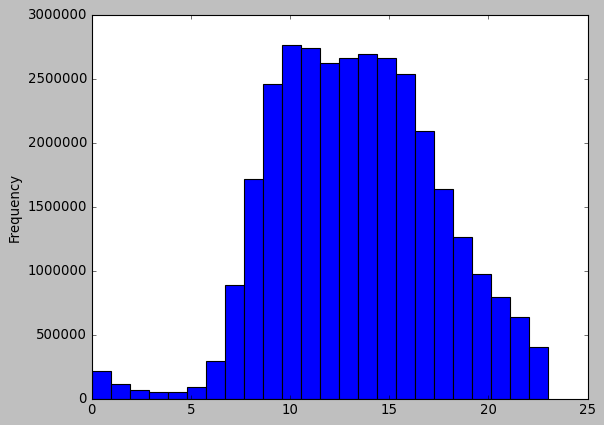

In [44]:
hist_task3 = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

In [8]:
ords_prods_cust['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

#### No outliers could be detected. Each possible time occurs at least once in the data set and the minimum (0) and maximum (23) values are not exceeded or fallen short of. Order hour 10 indicates the highest activity.

In [56]:
hist_task3.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.9_hist_task3.png'))

### 4. The distribution of orders among customers in terms of loyalty

In [11]:
ords_prods_cust['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal_Customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

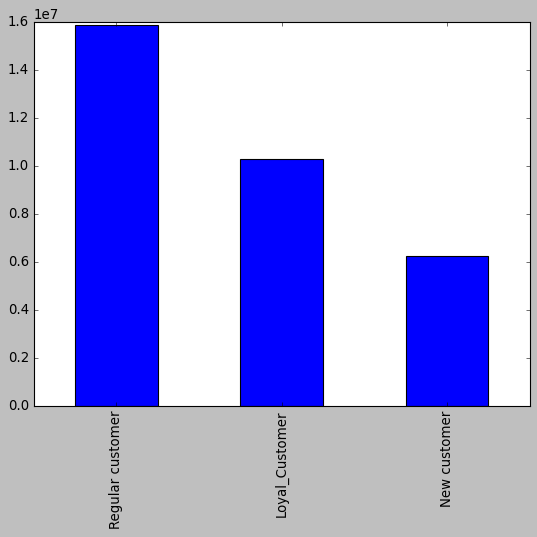

In [46]:
# chart using matplotlib
bar_matplotlib_task4 = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color=['blue'])

In [55]:
bar_matplotlib_task4.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.9_bar_task4.png'))

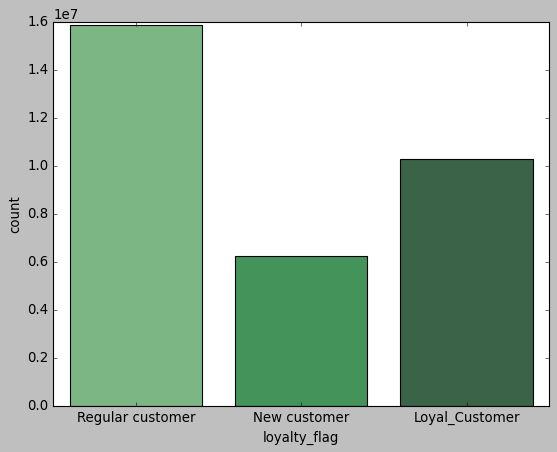

In [47]:
# plot using seaborn
bar_seaborn_task4 = sns.countplot(x=ords_prods_cust['loyalty_flag'], palette="Greens_d")

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day 

In [28]:
# 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned 
# number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 
# ratio. 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [29]:
# split the dataframe into two samples
# store 70% of the data in the dataframe called big
big = ords_prods_cust[dev]
# store 30% of the data in the dataframe called small
small = ords_prods_cust[~dev]

In [30]:
# length of the whole dataframe
len(ords_prods_cust)

32404859

In [31]:
# length of small and big together equals the length of the whole dataframe
len(big) + len(small)

32404859

In [32]:
# reducing the samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day”
ords_prods_cust_task5 = small[['order_hour_of_day','prices']]

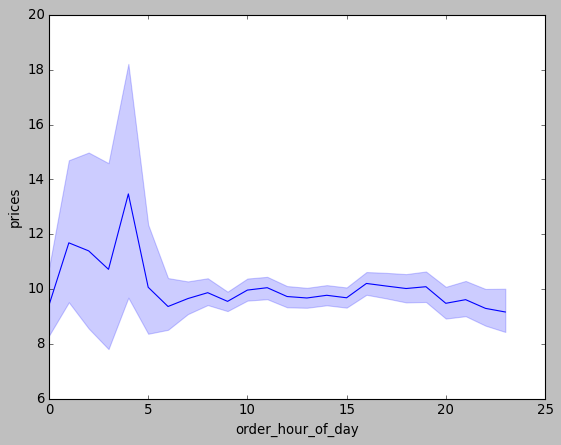

In [36]:
# creating the line chart using seaborn
line_task5 = sns.lineplot(data = ords_prods_cust_task5, x = 'order_hour_of_day', y = 'prices')

#### Hour 4am is the one with highest expenditures. 

In [54]:
line_task5.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.9_line_task5.png'))

### 6. Exploratory analysis of customer demographics to inform the targeted marketing campaigns

First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. In a markdown cell beneath your line chart, describe what the line chart shows.


In [39]:
# reducing the samples to only those columns necessary for the chart, namely “age” and “n_dependants”
ords_prods_cust_task6 = small[['n_dependants','prices']]

In [40]:
ords_prods_cust_task6.head()

,n_dependants,prices
0,1,5.8
2,1,20.0
3,1,20.0
6,1,4.4
10,1,12.8


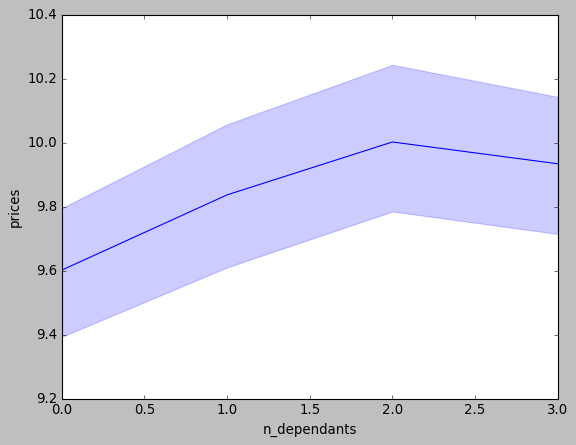

In [42]:
line_task6 = sns.lineplot(data = ords_prods_cust_task6, x = 'n_dependants',y = 'prices')

#### Customers with 3 dependants spend the most money. 

In [53]:
line_task6.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.9_line_task6.png'))

### 7. Explore whether there’s a connection between age and spending power (income)

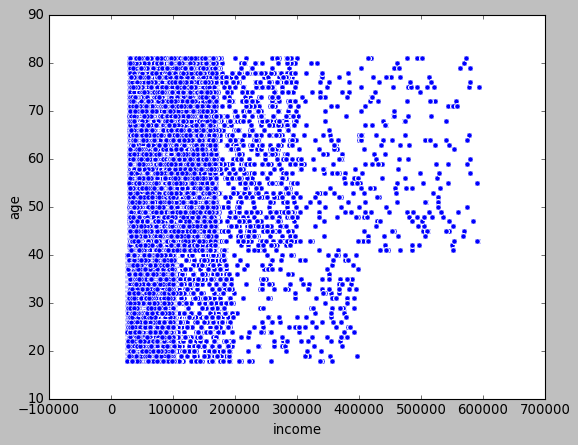

In [51]:
scatter_task7 = sns.scatterplot(x = 'income', y = 'age',data = ords_prods_cust)

#### At any age, income is most often in the lower quartile (up to about $180,000). No one under 40 has an income above $400,000. After 40, income rises in many cases to values between 180,000-320,000 dollars.

In [52]:
scatter_task7.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.9_scatter_task7.png'))

### 8. Data Export

#### see tasks 1-8